In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [48]:
CLASSES5 = ['angry', 'happy', 'neutral', 'sad', 'surprise']
CLASSES6 = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
CLASSES7 = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

ds = 'ravdess'
isAug = False

if isAug:
    X_train = np.load(f'./features/yamnet_emb/{ds}/train_aug_X.npy', allow_pickle=True)
    y_train = np.load(f'./features/yamnet_emb/{ds}/train_aug_y.npy', allow_pickle=True)
else:
    X_train = np.load(f'./features/yamnet_emb/{ds}/train_X.npy', allow_pickle=True)
    y_train = np.load(f'./features/yamnet_emb/{ds}/train_y.npy', allow_pickle=True)


X_val = np.load(f'./features/yamnet_emb/{ds}/val_X.npy', allow_pickle=True)
y_val = np.load(f'./features/yamnet_emb/{ds}/val_y.npy', allow_pickle=True)
X_test = np.load(f'./features/yamnet_emb/{ds}/test_X.npy', allow_pickle=True)
y_test = np.load(f'./features/yamnet_emb/{ds}/test_y.npy', allow_pickle=True)


if ds == 'crema':
    classes = CLASSES6
elif ds == 'bser':
    classes = CLASSES5
else: 
    classes = CLASSES7

# join train and val
# X_train = np.concatenate((X_train, X_val), axis=0)
# y_train = np.concatenate((y_train, y_val), axis=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# pca = PCA(n_components=0.70)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# X_train = X_train.reshape(X_train.shape[0], -1)
# X_test = X_test.reshape(X_test.shape[0], -1)

# X_train.shape, X_test.shape

(4700, 1024) (4700,) (1322, 1024) (1322,)


In [16]:
def evaluate(model, X_test, y_test, classes, title):

    preds = model.predict(X_test)

    print(classification_report(y_test,preds))

    acc = float(accuracy_score(y_test, preds))*100
    print("----accuracy score %s ----" % acc)

    cm = confusion_matrix(y_test, preds)

    cm = cm / cm.astype(float).sum(axis=1)

    sns.set(font_scale=2)

    fig, ax= plt.subplots(figsize=(20,15))
    sns.heatmap(cm, annot=True, fmt='.2g', ax=ax)

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix of ' + title); 
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)

## SVM

In [19]:
steps = [
        ('SVM', SVC(kernel = 'rbf'))]

pipeline = Pipeline(steps)

svc_scaled = pipeline.fit(X_train, y_train)

In [ ]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 53.0 ----
----test accuracy score 40.998487140695914 ----


              precision    recall  f1-score   support

    b'angry'       0.45      0.46      0.45       173
  b'disgust'       0.33      0.41      0.37       204
     b'fear'       0.31      0.19      0.23       158
    b'happy'       0.25      0.21      0.23       163
  b'neutral'       0.49      0.88      0.63       280
      b'sad'       0.29      0.11      0.16       178
 b'surprise'       0.56      0.30      0.39       166

    accuracy                           0.41      1322
   macro avg       0.38      0.36      0.35      1322
weighted avg       0.39      0.41      0.38      1322

----accuracy score 40.998487140695914 ----


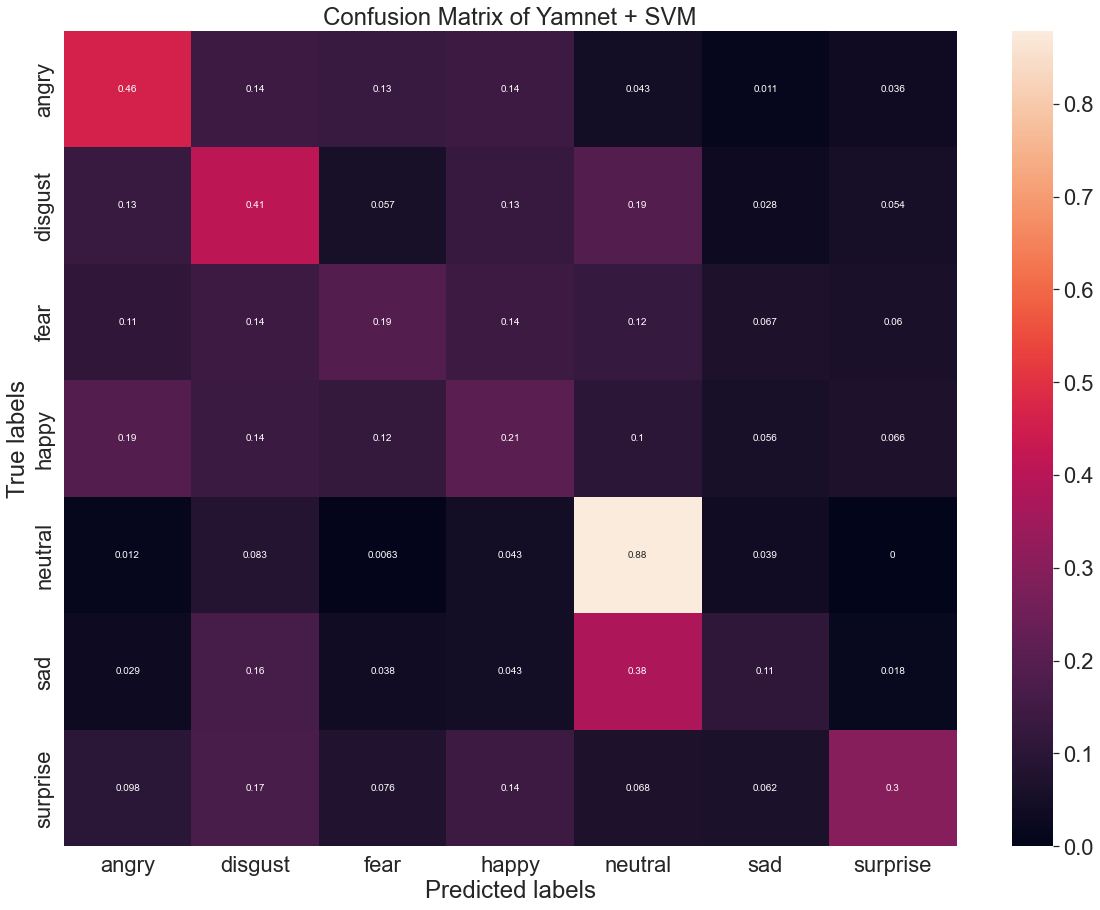

In [ ]:
evaluate(svc_scaled, X_test, y_test, classes, 'Yamnet + SVM')

## MLP Classifier

In [49]:
steps3 = [
        ('MLP', MLPClassifier())]
        
pipeline_mlp = Pipeline(steps3)

mlp = pipeline_mlp.fit(X_train, y_train)

/home/sam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
mlp_train_acc = float(mlp.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % mlp_train_acc)

mlp_test_acc = float(mlp.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % mlp_test_acc)

----train accuracy score 97.63829787234043 ----
----test accuracy score 37.97276853252647 ----


              precision    recall  f1-score   support

    b'angry'       0.40      0.40      0.40       173
  b'disgust'       0.29      0.33      0.31       204
     b'fear'       0.23      0.23      0.23       158
    b'happy'       0.23      0.17      0.19       163
  b'neutral'       0.62      0.65      0.64       280
      b'sad'       0.28      0.33      0.31       178
 b'surprise'       0.42      0.36      0.39       166

    accuracy                           0.38      1322
   macro avg       0.36      0.35      0.35      1322
weighted avg       0.38      0.38      0.38      1322

----accuracy score 37.97276853252647 ----


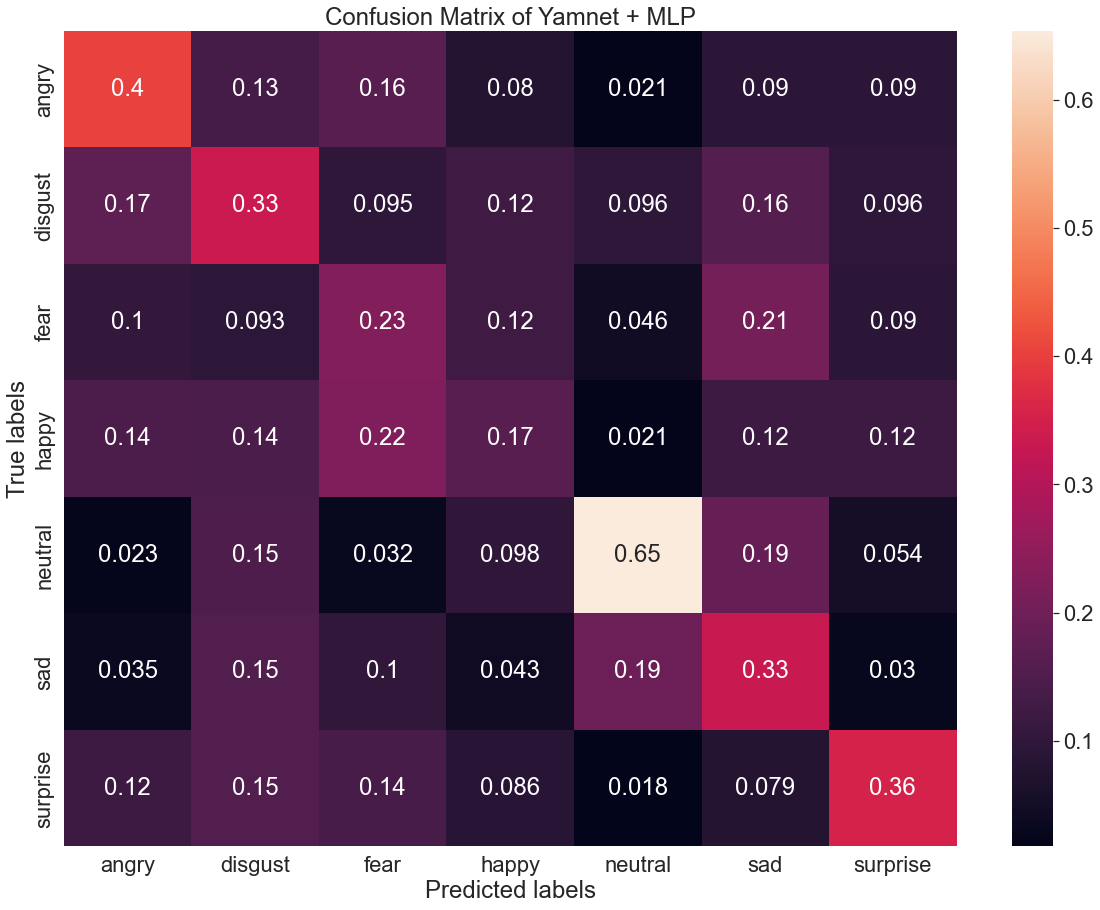

In [51]:
evaluate(mlp, X_test, y_test, classes, 'Yamnet + MLP')

## Random Forest

In [52]:
rfm = RandomForestClassifier(n_estimators=200)
rfm.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [53]:
rfm_train_acc = float(rfm.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % rfm_train_acc)

rfm_test_acc = float(rfm.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % rfm_test_acc)

----train accuracy score 100.0 ----
----test accuracy score 38.04841149773071 ----


              precision    recall  f1-score   support

    b'angry'       0.36      0.41      0.39       173
  b'disgust'       0.30      0.34      0.32       204
     b'fear'       0.30      0.18      0.23       158
    b'happy'       0.25      0.18      0.21       163
  b'neutral'       0.46      0.87      0.60       280
      b'sad'       0.27      0.10      0.14       178
 b'surprise'       0.52      0.27      0.36       166

    accuracy                           0.38      1322
   macro avg       0.35      0.33      0.32      1322
weighted avg       0.36      0.38      0.34      1322

----accuracy score 38.04841149773071 ----


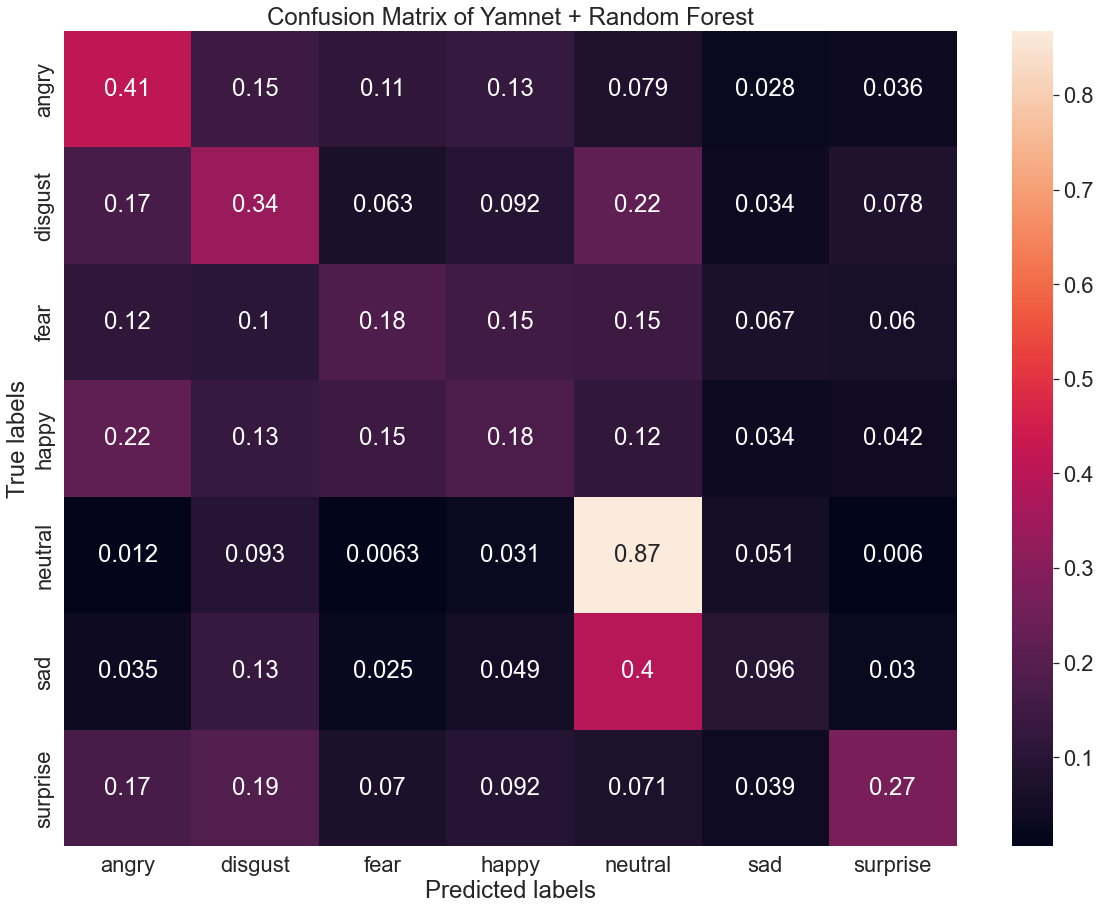

In [54]:
evaluate(rfm, X_test, y_test, classes, 'Yamnet + Random Forest')

## AdaBoost

In [55]:
abc = AdaBoostClassifier().fit(X_train, y_train)

In [56]:

abc_train_acc = float(abc.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % abc_train_acc)

abc_test_acc = float(abc.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % abc_test_acc)

----train accuracy score 35.87234042553191 ----
----test accuracy score 31.996974281391832 ----


              precision    recall  f1-score   support

    b'angry'       0.33      0.36      0.35       173
  b'disgust'       0.25      0.27      0.26       204
     b'fear'       0.21      0.11      0.14       158
    b'happy'       0.17      0.18      0.18       163
  b'neutral'       0.46      0.75      0.57       280
      b'sad'       0.20      0.11      0.14       178
 b'surprise'       0.27      0.17      0.21       166

    accuracy                           0.32      1322
   macro avg       0.27      0.28      0.26      1322
weighted avg       0.29      0.32      0.29      1322

----accuracy score 31.996974281391832 ----


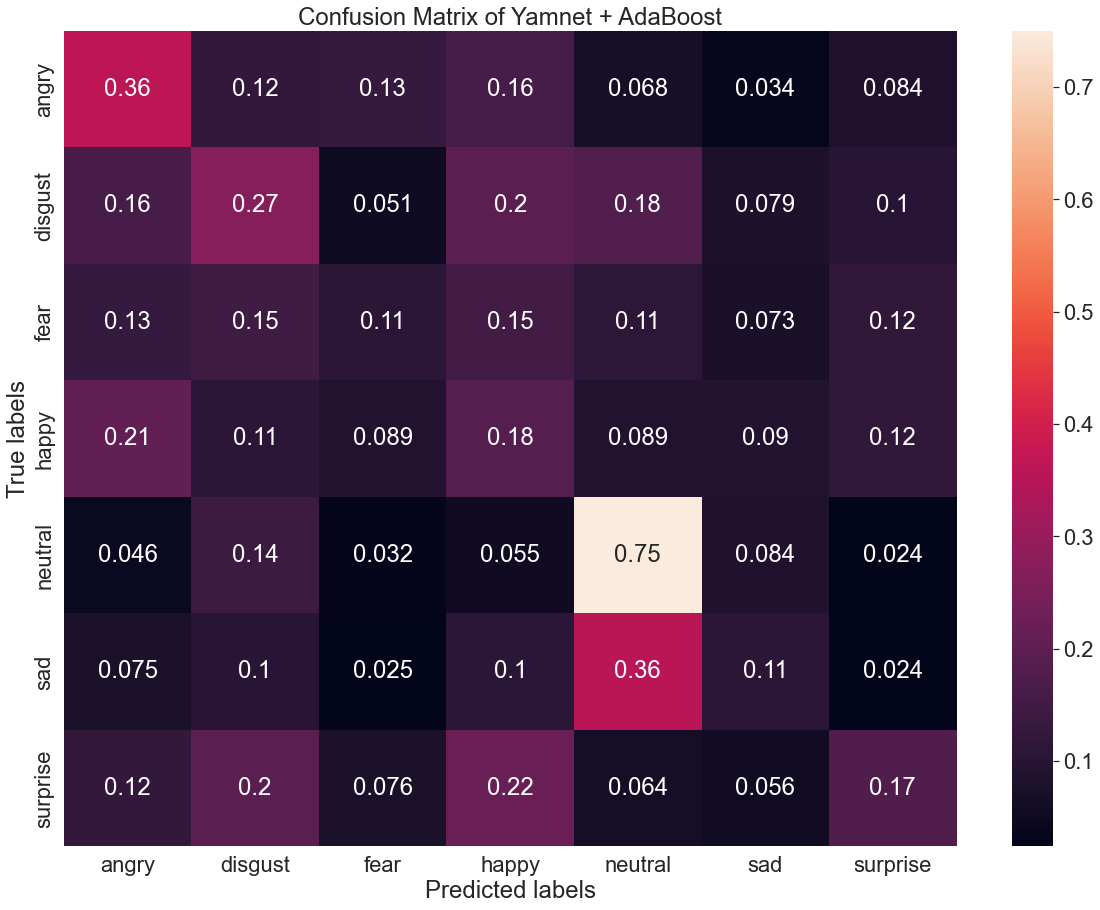

In [57]:
evaluate(abc, X_test, y_test, classes, 'Yamnet + AdaBoost')